# Introduction

For our CS108 final project, we decided to create a prediction model for income using a census dataset from the UCI Machine Learning Repository. We split this notebook into the major sections in most EDA projects which were Data Collection, Data Cleaning, Data Preprocessing, Data Analysis, Logisitic Regression, Prediction Model, and Fairness Analysis.

Our main challenges in this project had to do with our low quality dataset as well as the limited experience we had with fairness evaluation and bias mitigation. We tested many different strategies as well as prediction models and whatever is in this notebook when submitted is our final and best attempt of predictions and fairness.

Our Overall goal in this project is to create a model that can predict income ranges accurately and analyze the fairness between the data and the predicted values.

# Data Collection

## Importing Dependencies

### The goal of this section is to import all necessary dependencies as well as check their version numbers for compatibility.

In [ ]:
!pip install aequitas
!pip install tabulate

In [ ]:
import seaborn as sns
sns.__version__

'0.13.1'

In [ ]:
import numpy as np
np.__version__

'1.23.5'

In [ ]:
import pandas as pd
pd.__version__

'1.5.3'

In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'3.7.1'

In [ ]:
from tabulate import tabulate

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import aequitas as aq
from aequitas.preprocessing import preprocess_input_df
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.plotting import Plot
from aequitas.fairness import Fairness

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline

## Importing Data

### The goal of this section was to import our dataset from a mounted drive as well as create a dataframe to use for analysis and predictions.

In [ ]:
data = pd.read_csv('/content/drive/My Drive/adult.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## About The Data

### This is a quick snippet of the original datasets features.

| Variable    | Description |
| ----------- | ----------- |
| Age| Describes the age of individuals. Continuous.
| Workclass| Private, Self-emp-not-inc, Self-emp-inc, | Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
| fnlwgt| Continuous.
| education| Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num| Number of years spent in education. Continuous.
marital-status| Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
| occupation| Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, <br>Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
| relationship| Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
| race| White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
| sex| Female, Male.
| capital-gain| Continuous.
| capital-loss| Continuous.
| hours-per-week| Continuous.
| native-country| United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,<br> Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
| salary| >50K,<=50K



# Data Cleaning

### The goal of this section is to clean our data and make it viable to be used for analysis as well as prediction.

In [ ]:
# Choosing Features
selected_columns = ['age', 'education', 'occupation', 'race', 'sex', 'hours.per.week', 'native.country', 'income']
data = data[selected_columns]

In the cell above, we chose 7 features: age, education, occupation, race, sex, hours per week and native country. We also chose the feature we were going to study and predict: income.

In [ ]:
data.replace('?', pd.NA, inplace=True)

missing_values = data.isnull().sum()
print(missing_values)

age                  0
education            0
occupation        1843
race                 0
sex                  0
hours.per.week       0
native.country     583
income               0
dtype: int64


<ipython-input-288-c4bec46f90a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace('?', pd.NA, inplace=True)


We noticed our dataset was filled with question marks rather than null values. The cell above is meant migiate this issue by replacing them with NA's.

In [ ]:
# Drop rows with missing values
data = data.dropna()
data.head()

,age,education,occupation,race,sex,hours.per.week,native.country,income
1,82,HS-grad,Exec-managerial,White,Female,18,United-States,<=50K
3,54,7th-8th,Machine-op-inspct,White,Female,40,United-States,<=50K
4,41,Some-college,Prof-specialty,White,Female,40,United-States,<=50K
5,34,HS-grad,Other-service,White,Female,45,United-States,<=50K
6,38,10th,Adm-clerical,White,Male,40,United-States,<=50K


We now used these NA's and drop rows that have atleast one NA.

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

age               0
education         0
occupation        0
race              0
sex               0
hours.per.week    0
native.country    0
income            0
dtype: int64


After doing so, you can see that our data is now filled with valid values.

# Data Preprocessing

### The goal of this section is to preprocess the dataset to be able to use it in our prediciton models.

In [ ]:
print(data['race'].value_counts())

White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: race, dtype: int64


This is a quick check on the distribution of race values and as you can tell white people are overrepresented and all other races have much fewer. This is the moment where we decided to only study white vs black.

In [ ]:
#Get the count of Black people
black_df = data[data['race'] == 'Black']
white_df = data[data['race'] == 'White']
black_count = len(black_df)
sampled_white = white_df.sample(n=black_count, replace=False)
data = pd.concat([sampled_white, black_df])

In the cell above, we created two df's one with only black people and one with only white people. We then took the count of the black_df and took that number to sample from the white_df to have a uniform distribution between these two races.

In [ ]:
data['race'].value_counts()

White    2817
Black    2817
Name: race, dtype: int64

As you can tell, that strategy worked and we are now working with a more fair playing field.

In [ ]:
data.reset_index(inplace=True, drop=True)

Necessary as the concatenation messed up the indices.

In [ ]:
data['income'] = data['income'].apply(lambda x: 0 if x == '<=50K' else 1)

Here is our method of turning the income column into numeric values rather than categorical.

In [ ]:
data.head()

,age,education,occupation,race,sex,hours.per.week,native.country,income
0,19,HS-grad,Other-service,White,Female,50,United-States,0
1,29,Some-college,Tech-support,White,Female,40,United-States,0
2,31,HS-grad,Prof-specialty,White,Female,40,United-States,0
3,46,Prof-school,Prof-specialty,White,Male,50,United-States,1
4,44,Bachelors,Adm-clerical,White,Female,40,Cuba,0


This is for checking if that income transformation line worked.

In [ ]:
# Create df for Aequitas
df_audit = data.copy()

We made a copy of this df and created an audit version for fairness evaluation in our dataset.

In [ ]:
df_audit.head()

,age,education,occupation,race,sex,hours.per.week,native.country,income
0,19,HS-grad,Other-service,White,Female,50,United-States,0
1,29,Some-college,Tech-support,White,Female,40,United-States,0
2,31,HS-grad,Prof-specialty,White,Female,40,United-States,0
3,46,Prof-school,Prof-specialty,White,Male,50,United-States,1
4,44,Bachelors,Adm-clerical,White,Female,40,Cuba,0


In [ ]:
# Initialize LabelEncoder and Encode Education Column
label_encoder = LabelEncoder()

transformed_cols = []

original_mappings = {}

encoded_data = data

for column in data.columns:
    if data[column].dtype == 'object':
        transformed_cols.append(column)
        encoded_data[column] = label_encoder.fit_transform(data[column])
        original_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))



print("Tranformed Columns:", transformed_cols)

for column, mapping in original_mappings.items():
    table = [[label, encoded_value] for label, encoded_value in mapping.items()]
    print(f"\n{column}:")
    print(tabulate(table, headers=["Label", "Encoded Value"], tablefmt="grid"))

Tranformed Columns: ['education', 'occupation', 'race', 'sex', 'native.country']

education:
+--------------+-----------------+
| Label        |   Encoded Value |
+==============+=================+
| 10th         |               0 |
+--------------+-----------------+
| 11th         |               1 |
+--------------+-----------------+
| 12th         |               2 |
+--------------+-----------------+
| 1st-4th      |               3 |
+--------------+-----------------+
| 5th-6th      |               4 |
+--------------+-----------------+
| 7th-8th      |               5 |
+--------------+-----------------+
| 9th          |               6 |
+--------------+-----------------+
| Assoc-acdm   |               7 |
+--------------+-----------------+
| Assoc-voc    |               8 |
+--------------+-----------------+
| Bachelors    |               9 |
+--------------+-----------------+
| Doctorate    |              10 |
+--------------+-----------------+
| HS-grad      |              11

This is a custom function made with the labelencoder api. Our goal was to go through all columns in the dataframe, check if they are categorical or numeric and one hot encode all categorical columns. After doing so, it prints a table of all the columns that were transformed with their encoded values.

In [ ]:
data.head()

,age,education,occupation,race,sex,hours.per.week,native.country,income
0,19,11,7,1,0,50,31,0
1,29,15,12,1,0,40,31,0
2,31,11,9,1,0,40,31,0
3,46,14,9,1,1,50,31,1
4,44,9,0,1,0,40,2,0


This is proof that our labelencoder function worked well.

In [ ]:
X = encoded_data[['age', 'education', 'occupation', 'race', 'sex', 'hours.per.week', 'native.country']]
y = encoded_data['income']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The above cell is to split our train and test data with our chosen features and output.

In [ ]:
X_train['race'].value_counts()

0    2264
1    2243
Name: race, dtype: int64

In [ ]:
# Trying to balance the data
# smote = SMOTE(random_state=42)

# X_train, y_train = smote.fit_resample(X_train, y_train)
# X_test, y_test = smote.fit_resample(X_test, y_test)

We tried to use smote for balancing the data, but we had issues with this method as it didn't change much in our data.

In [ ]:
X_train['race'].value_counts()

0    2264
1    2243
Name: race, dtype: int64

This cell was meant to check what smote had done to our dataset. If you want to see the result of smote, uncomment the cell above this one and rerun.

# Data Analysis

### The goal of this section is to analyze our dataset and see if we can come to any conclusions or ideas before we start predicting values.

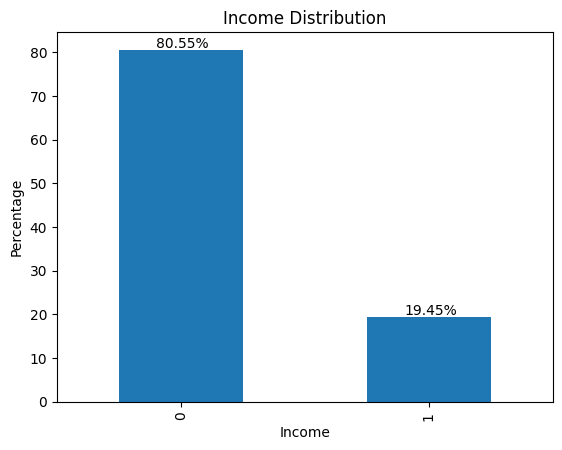

In [ ]:
income_distribution = data['income'].value_counts(normalize=True) * 100
ax = income_distribution.plot(kind='bar')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Percentage')
for i in ax.patches:
    plt.text(i.get_x() + 0.15, i.get_height() + 0.5, str(round(i.get_height(), 2)) + '%', fontsize=10, color='black')
plt.show()

This is a quick distribution of income in our dataset. As you can tell far less people make more than 50k rather than less than 50k. We knew from this point our model may have an issue predicting more than 50k for individuals.

<ipython-input-306-cc4cc80ab20e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='income_label', y='age', data=data, palette='muted')


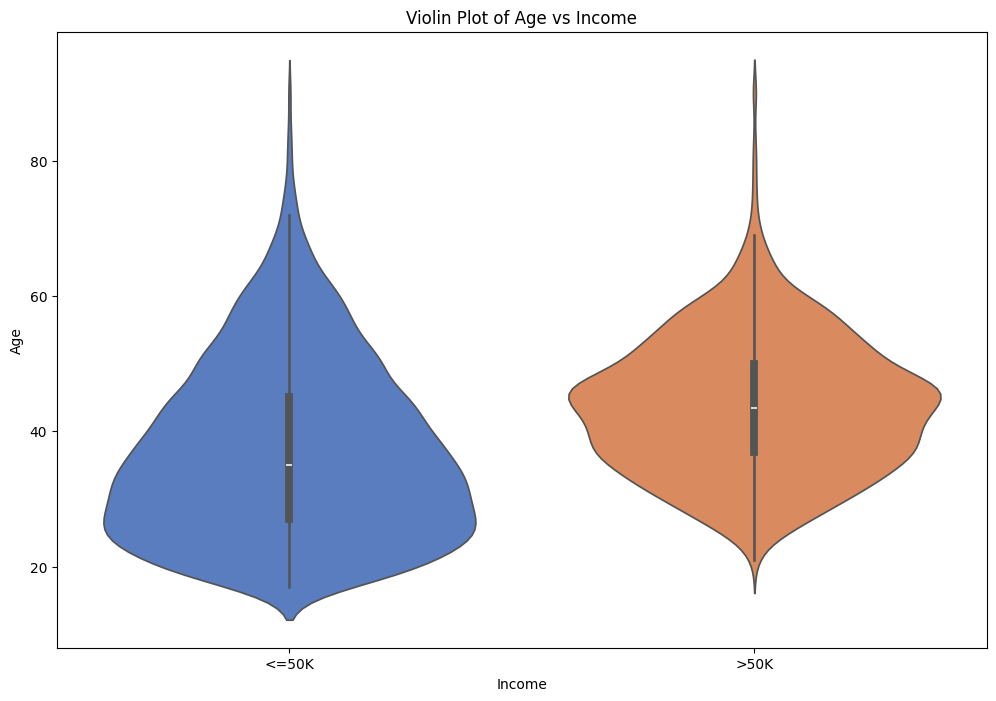

In [ ]:
data['income_label'] = data['income'].map({0: '<=50K', 1: '>50K'})

plt.figure(figsize=(12, 8))
sns.violinplot(x='income_label', y='age', data=data, palette='muted')
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Violin Plot of Age vs Income')
plt.show()

We made this plot to visualize age to income using a violin plot. As you can tell the older you are the higher the frequency of making more than 50k.

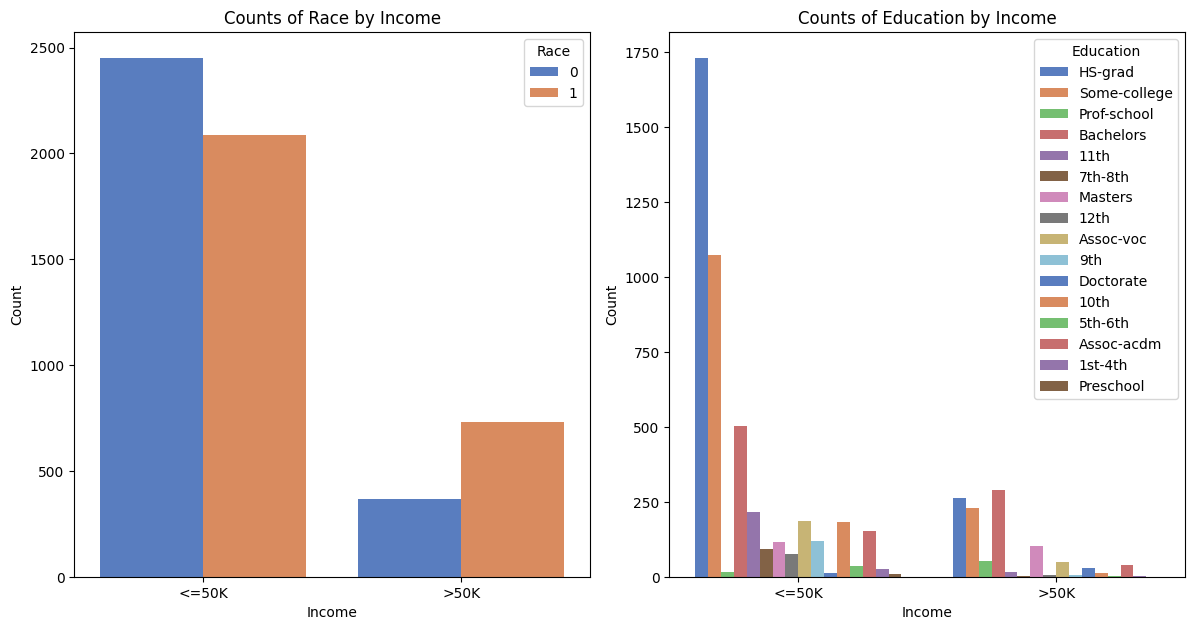

In [ ]:
race_labels_mapping = {
    0: 'White',
    1: 'Black'
}
education_labels_mapping = {
    0: '10th',
    1: '11th',
    2: '12th',
    3: '1st-4th',
    4: '5th-6th',
    5: '7th-8th',
    6: '9th',
    7: 'Assoc-acdm',
    8: 'Assoc-voc',
    9: 'Bachelors',
    10: 'Doctorate',
    11: 'HS-grad',
    12: 'Masters',
    13: 'Preschool',
    14: 'Prof-school',
    15: 'Some-college'
}

data['education_label'] = data['education'].map(education_labels_mapping)
data['race_label'] = data['race'].map(race_labels_mapping)

plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 1)
label_by_race = sns.countplot(x="income_label", hue="race", data=data, palette='muted')

label_by_race.set_xlabel("Income")
label_by_race.set_ylabel("Count")
label_by_race.set_title("Counts of Race by Income")

plt.legend(title="Race")

plt.subplot(2, 3, 2)

label_by_education = sns.countplot(x="income_label", hue="education_label", data=data, palette='muted')
label_by_education.set_xlabel("Income")
label_by_education.set_ylabel("Count")
label_by_education.set_title("Counts of Education by Income")

plt.legend(title="Education")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

These are the distributions of Race vs income and Education vs income. Since we removed Asian-Pac-Islander, Amer-Indian-Eskimo, and Other from the races, 0 would be Whites and 1 would be Blacks. For the Education by Income plot, we can see that a majority of the population of people earning less than $50k a year are only High School graduates.

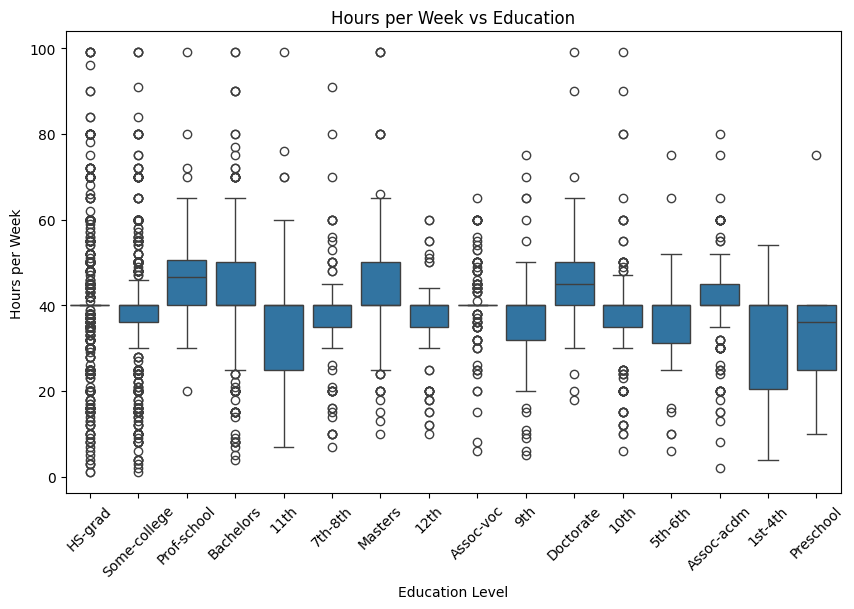

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x="education_label", y="hours.per.week", data=data)

plt.xlabel("Education Level")
plt.ylabel("Hours per Week")
plt.title("Hours per Week vs Education")

plt.xticks(rotation=45)

plt.show()


This graph compares the hours worked per week with education levels. Each bar represents a different education level, and the height of each bar indicates the average number of hours worked per week by individuals with that level of education.

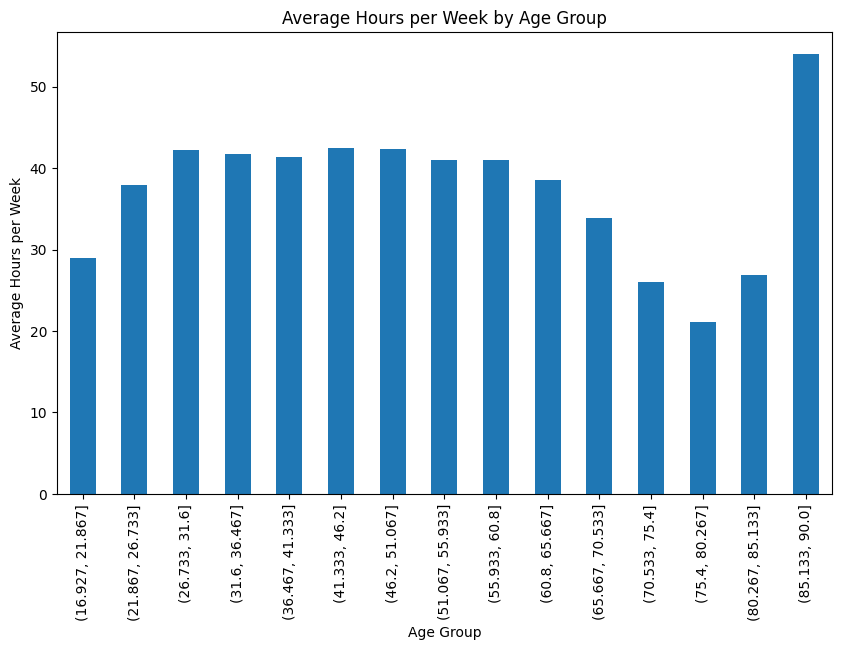

In [ ]:
age_bins = pd.cut(data['age'], bins=15)

age_hours = data.groupby(age_bins)['hours.per.week'].mean()

plt.figure(figsize=(10, 6))

age_hours.plot(kind='bar')

plt.xlabel("Age Group")
plt.ylabel("Average Hours per Week")
plt.title("Average Hours per Week by Age Group")

plt.show()

This is the graph depicting average hours worked per week across different age groups. The height of each bar indicates the average number of hours worked per week by individuals in that age range. As you can see the average number of hours starts of low and then is relatively the same throughout the 21 to 65 age range. The number of hours starts to dip after 65, with a strange outlier after 85 due to the low sample size for that age group.

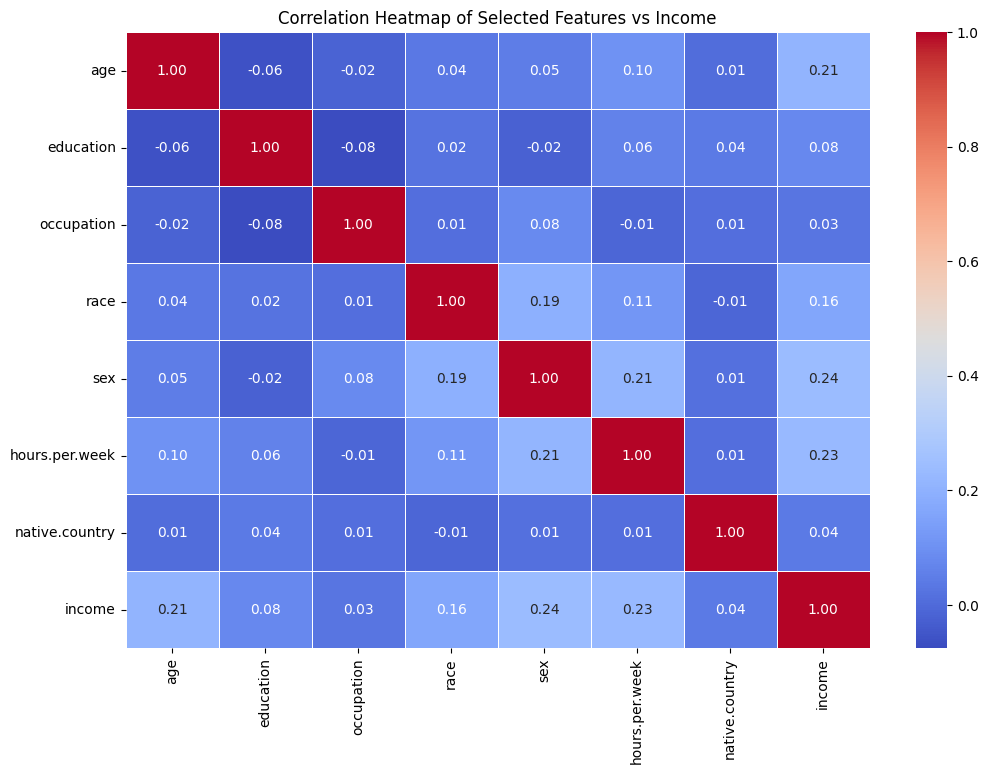

In [ ]:
selected_features = ['age', 'education', 'occupation', 'race', 'sex', 'hours.per.week', 'native.country', 'income']

subset_data = encoded_data[selected_features]

plt.figure(figsize=(12, 8))
sns.heatmap(subset_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Features vs Income')
plt.show()

This correlation plot was meant to understand which features were highly correlated to the income field. As you can tell the protected attributes of age, sex and race were all correlated to some degree rather than education, occupation and native country.

# Logisitic Regression

### The goal of this section was to create a simple logisitic regression model to evaluate our custom model later in this project as well as evaluate fairness using this model architecture.

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

This is a simple way to intialize a logistic regression model with our training data as well as training our model.

In [ ]:
# Make predictions on the test set
predictions = lr_model.predict(X_test)

In the cell above, we made predictions on the test set to evaluate the accuracy of the model.

In [ ]:
# Evaluate model accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8021295474711624


In the cell above, we used the predictions to evaluate the accuracy of the logisitic regression model and we noticed an average accuracy of 81%.

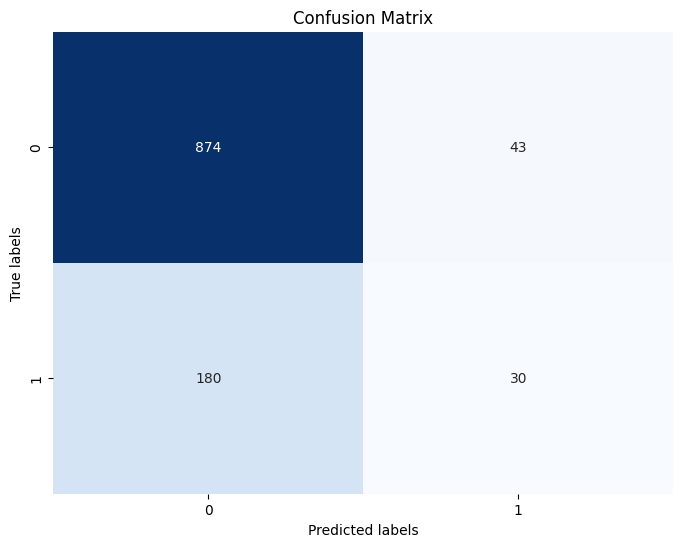

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

We used a confusion matrix to display the TN, FN, TP, FP rates and as you can tell from what we predicted before, it is very hard for this model to predict 1's as there is such a little amount of individuals making more than 50k.

In [ ]:
# Classification report
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89       917
           1       0.41      0.14      0.21       210

    accuracy                           0.80      1127
   macro avg       0.62      0.55      0.55      1127
weighted avg       0.75      0.80      0.76      1127



We created a classification report for the logisitic regression model and as you can tell the model is really good with predicting less than 50k; however, struggles with the higher income predictions. As you can tell the recall on 0's is almost 100% while the recall on 1's is 20%. This is a clear issue in our data and model.

# Prediction Model

### The goal of this section is to create a custom prediction model to evaluate against our logisitic regression model.

In [ ]:
# Create Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(X_train.shape[1], )),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In the cell above, we have a custom model architecture with 3 dense layers. 2 of these layers use a rectified linear unit activation function and the last layer uses a sigmoid activation with 1 neuron to output a value between 0 and 1. For the first layer, we chose 7 neurons since we had 7 features and wanted to use 1 nueron for each feature. We used dropout layers to help further generalize our predictions. We also added l2 regularizers to punish large coefficients that were inherently created in our model.

In [ ]:
# Intialize Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

We decided to use the adam optimizer as it is almost the same as stochastic gradient descent with the incorporation of momentum.

In [ ]:
# Compile the model
model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['accuracy'])

The cell above was used to compile our model with MSE as our loss function and used accuracy for our metric.

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
113/113 [==============================] - 3s 8ms/step - loss: 0.4912 - accuracy: 0.6008 - val_loss: 0.2999 - val_accuracy: 0.8049
Epoch 2/10
113/113 [==============================] - 1s 6ms/step - loss: 0.3328 - accuracy: 0.7196 - val_loss: 0.2710 - val_accuracy: 0.8049
Epoch 3/10
113/113 [==============================] - 1s 4ms/step - loss: 0.2730 - accuracy: 0.7709 - val_loss: 0.2543 - val_accuracy: 0.8049
Epoch 4/10
113/113 [==============================] - 0s 4ms/step - loss: 0.2482 - accuracy: 0.7781 - val_loss: 0.2406 - val_accuracy: 0.8049
Epoch 5/10
113/113 [==============================] - 1s 8ms/step - loss: 0.2290 - accuracy: 0.7870 - val_loss: 0.2227 - val_accuracy: 0.8049
Epoch 6/10
113/113 [==============================] - 1s 5ms/step - loss: 0.2156 - accuracy: 0.7950 - val_loss: 0.2106 - val_accuracy: 0.8049
Epoch 7/10
113/113 [==============================] - 1s 5ms/step - loss: 0.2018 - accuracy: 0.7997 - val_loss: 0.1865 - val_accuracy: 0.8049
Epoch 

The cell above was meant for training the model with 10 epochs and a validation split of 0.2.

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

36/36 [==============================] - 0s 2ms/step - loss: 0.1726 - accuracy: 0.8137
Test accuracy: 0.8136646151542664


We noticed our model was very similar in accuracy compared to the logisitic regression model with an average accuracy of 80%.

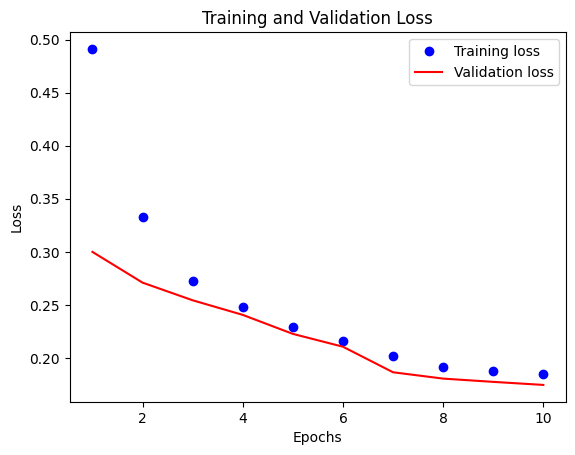

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We used the history from our training to plot the training and validation loss during the 10 epochs. This was used to determine how many epochs to use which brought us to 10 in the end.

In [ ]:
# Test One Prediction
idx = 1
test = X.iloc[idx].values.reshape(1, -1)
real = y.iloc[idx]
print(test)
pred = model.predict(test)
print("Prediction:", pred)
print("Real:", real)

[[29 15 12  1  0 40 31]]
1/1 [==============================] - 0s 58ms/step
Prediction: [[0.23104678]]
Real: 0


We set the cell above up to test our model as well as figure out a threshold to convert our predictions to either a 0 or 1 as we used a sigmoid activation function for our output layer. We tested many different records and came to 0.22 being a great threshold for the distinction of 0 (below 50k) or 1 (above 50k). We did notice if you rerun the notebook these thresholds change and we must account for that anytime we rerun the model.

36/36 [==============================] - 0s 2ms/step


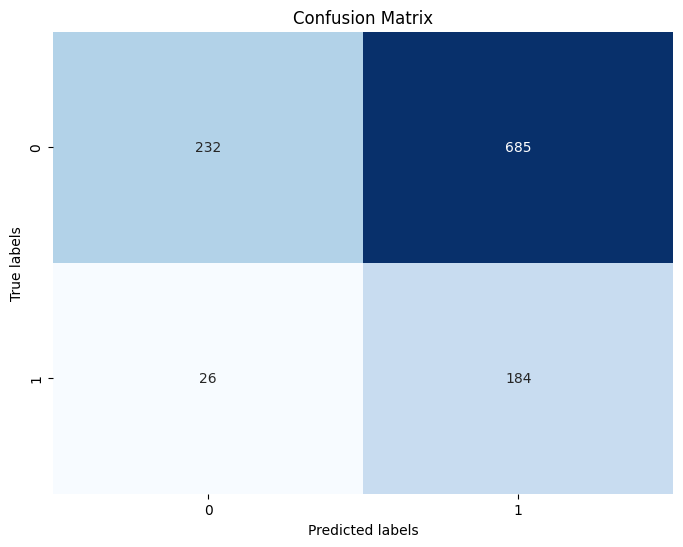

In [ ]:
# Plot confusion matrix
predictions = model.predict(X_test)
predictions_rounded = [0 if x - int(x) < 0.23 else 1 for x in predictions]
conf_matrix = confusion_matrix(y_test, predictions_rounded)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

As you can tell, this model also had a large issue predicting 1's and at this point we were convinced our dataset was not large enough and did not have enough samples of individuals making more than 50k.

In [ ]:
# Classification report
class_report = classification_report(y_test, predictions_rounded)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.23      0.36       917
           1       0.21      0.90      0.34       210

    accuracy                           0.35      1127
   macro avg       0.56      0.56      0.35      1127
weighted avg       0.78      0.35      0.36      1127



We used another classification report to determine the bias in our models and came out with very similar results to our logistic regression model. As you can tell, it is very hard for this model to recall 1's rather than 0's and this is because of the distribution in the original dataset. This issue persists between all groups of ages, race and sex so, we determined the data to be at fault rather than implicit bias.

# Fairness Analysis

### The goal of this section is to analyze the fairness in our predictions and figure out way to mitigate bias in our models.

In [ ]:
# model.get_weights()

In [ ]:
# Preparing Data for Aequitas
df_audit = df_audit.rename(columns={'income': 'label_value'})
predictions = model.predict(X)
predictions_rounded = [0 if x - int(x) < 0.23 else 1 for x in predictions]
df_audit['score'] = predictions_rounded

df_audit.head(100)

177/177 [==============================] - 0s 2ms/step


,age,education,occupation,race,sex,hours.per.week,native.country,label_value,score
0,17.00-28.00,HS-grad,Other-service,White,Female,40.00-99.00,United-States,0,0
1,28.00-37.00,Some-college,Tech-support,White,Female,1.00-40.00,United-States,0,1
2,28.00-37.00,HS-grad,Prof-specialty,White,Female,1.00-40.00,United-States,0,1
3,37.00-47.00,Prof-school,Prof-specialty,White,Male,40.00-99.00,United-States,1,1
4,37.00-47.00,Bachelors,Adm-clerical,White,Female,1.00-40.00,Cuba,0,1
...,...,...,...,...,...,...,...,...,...
95,47.00-90.00,5th-6th,Craft-repair,White,Male,40.00-99.00,Italy,0,1
96,28.00-37.00,HS-grad,Other-service,White,Female,1.00-40.00,United-States,0,1
97,28.00-37.00,Masters,Sales,White,Male,40.00-99.00,United-States,1,1
98,28.00-37.00,HS-grad,Exec-managerial,White,Female,1.00-40.00,United-States,0,1


The above cell was meant to prepare a new dataframe for the aequitas library.

In [ ]:
# Preprocessing Data for Aequitas
aeq_data = preprocess_input_df(df_audit)

In [ ]:
# Specifying Sensitive Attributes
aeq_group = Group()

# Generate crosstabs
xtab, _ = aeq_group.get_crosstabs(df_audit)

# Compute metrics
absolute_metrics = aeq_group.list_absolute_metrics(xtab)

# Displays crosstab info for confusion matrix metrics + metadata
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,4378,age,17.00-28.00,934,536,879,1,535,55,56,1414,1470,5634
1,0,binary 0/1,4378,age,28.00-37.00,1351,82,1089,5,77,262,267,1166,1433,5634
2,0,binary 0/1,4378,age,37.00-47.00,1291,116,888,15,101,403,418,989,1407,5634
3,0,binary 0/1,4378,age,47.00-90.00,802,522,513,66,456,289,355,969,1324,5634
4,0,binary 0/1,4378,education,10th,116,77,109,5,72,7,12,181,193,5634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0,binary 0/1,4378,native.country,Puerto-Rico,10,5,9,0,5,1,1,14,15,5634
69,0,binary 0/1,4378,native.country,Scotland,2,0,2,0,0,0,0,2,2,5634
70,0,binary 0/1,4378,native.country,Trinadad&Tobago,10,5,8,0,5,2,2,13,15,5634
71,0,binary 0/1,4378,native.country,United-States,4042,1221,3072,82,1139,970,1052,4211,5263,5634


After computing the metrics, we realized that since our model was not predicting 1's all of our metrics for the groups shows up at 0 for pp and 0 for fp. This was a hard problem to deal with and our model was the issue at hand. If the threshold was set properly, this chart seemed to come out more correct; however, we had a very hard time doing this with so little experience with neural networks as well as aequitas.

In [ ]:
xtab_with_metrics = xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

The above cell was meant to create an xtab with metrics according to the groups created in the group function provided by Aequitas.

<ipython-input-346-097c2a7047dc>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  label_by_race.set_xticklabels(label_by_race.get_xticklabels(), rotation=90)
<ipython-input-346-097c2a7047dc>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  label_by_age.set_xticklabels(label_by_age.get_xticklabels(), rotation=90)
<ipython-input-346-097c2a7047dc>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  label_by_sex.set_xticklabels(label_by_sex.get_xticklabels(), rotation=90)
<ipython-input-346-097c2a7047dc>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  by_race.set_xticklabels(by_race.get_xticklabels(), rotation=90)
<ipython-input-346-097c2a7047dc>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  by_sex.set_xticklabels(by_sex.get_xticklabels(), rotation=90)
<ipython-input-346-097c2a7047dc>:27: UserWarning: FixedFormatter should only be u

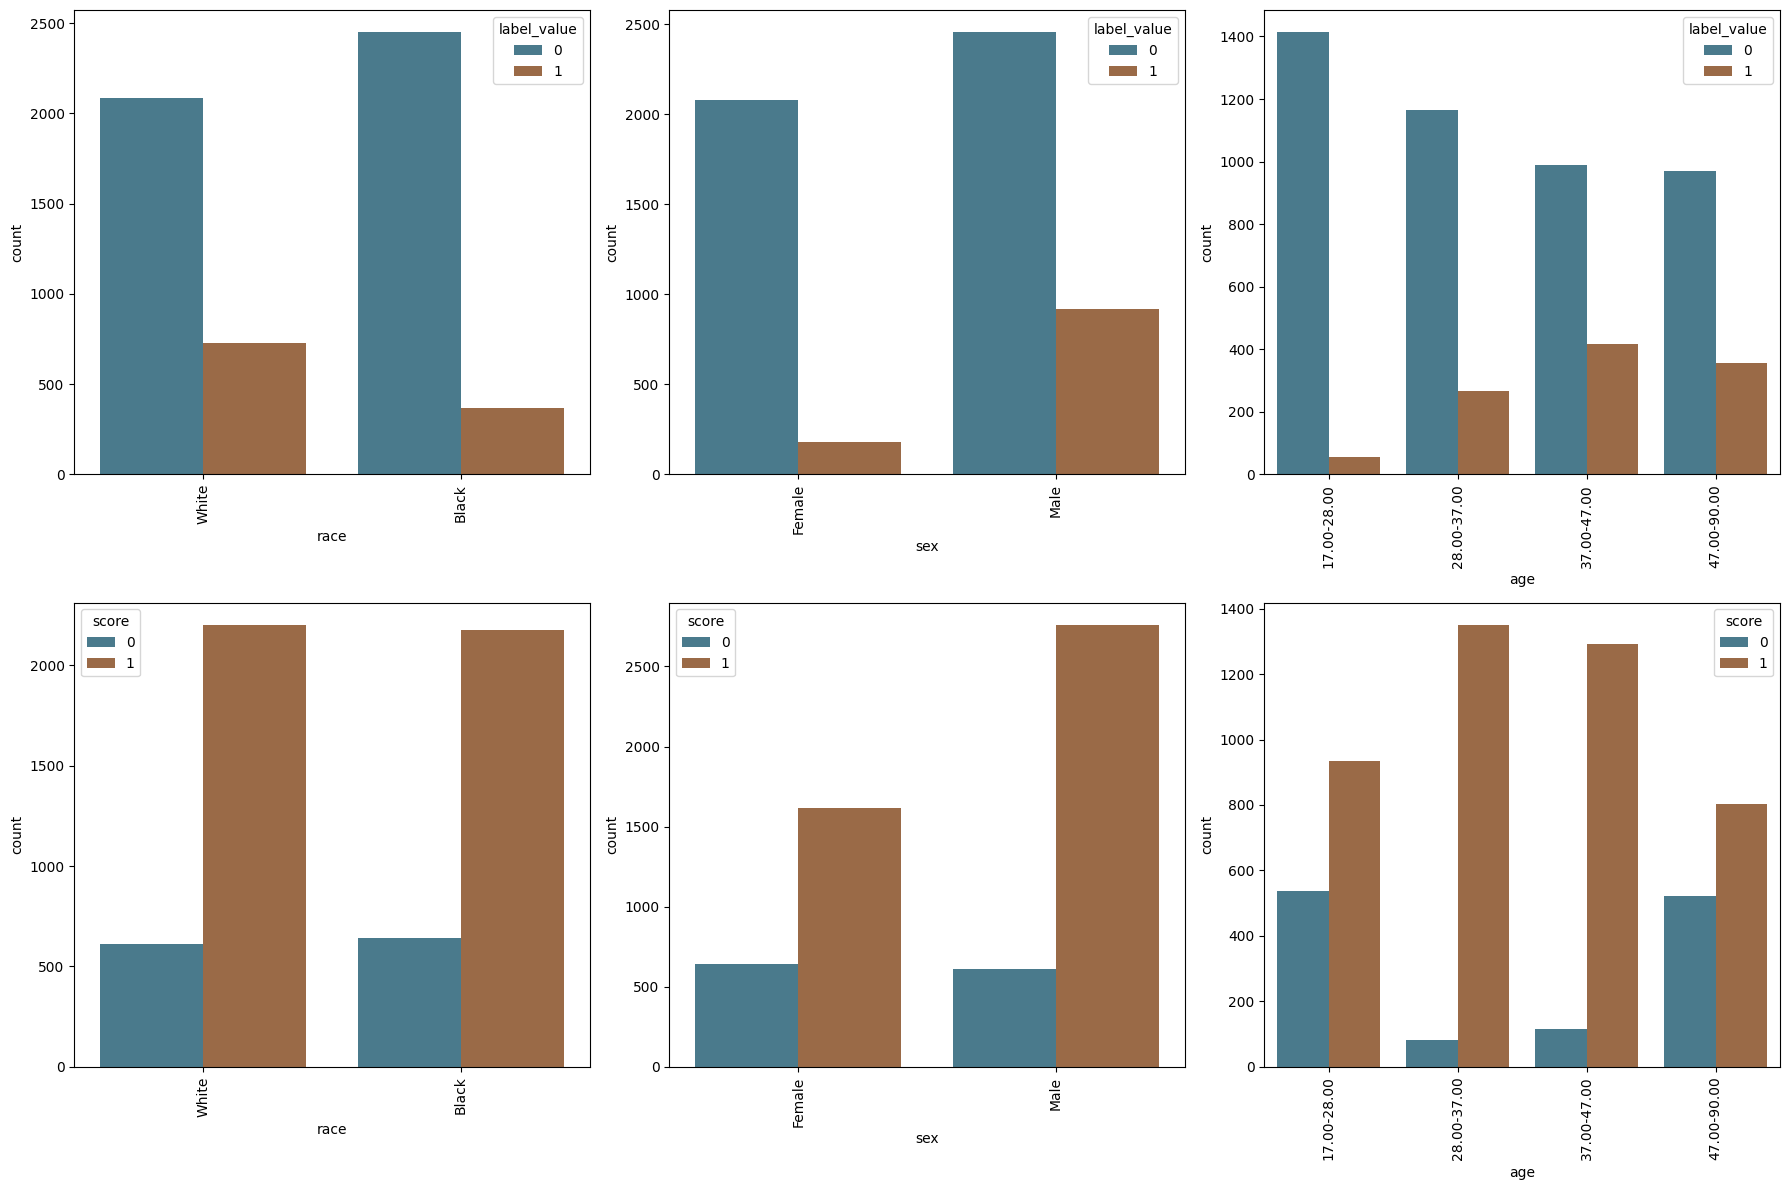

In [ ]:
aq_palette = sns.diverging_palette(225, 35, n=2)

plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
label_by_race = sns.countplot(x="race", hue="label_value", data=df_audit, palette=aq_palette)
label_by_race.set_xticklabels(label_by_race.get_xticklabels(), rotation=90)

plt.subplot(2, 3, 2)
label_by_age = sns.countplot(x="sex", hue="label_value", data=df_audit, palette=aq_palette)
label_by_age.set_xticklabels(label_by_age.get_xticklabels(), rotation=90)

plt.subplot(2, 3, 3)
label_by_sex = sns.countplot(x="age", hue="label_value", data=df_audit, palette=aq_palette)
label_by_sex.set_xticklabels(label_by_sex.get_xticklabels(), rotation=90)

plt.subplot(2, 3, 4)
by_race = sns.countplot(x="race", hue="score", data=df_audit, palette=aq_palette)
by_race.set_xticklabels(by_race.get_xticklabels(), rotation=90)

plt.subplot(2, 3, 5)
by_sex = sns.countplot(x="sex", hue="score", data=df_audit, palette=aq_palette)
by_sex.set_xticklabels(by_sex.get_xticklabels(), rotation=90)

plt.subplot(2, 3, 6)
by_age = sns.countplot(x="age", hue="score", data=df_audit, palette=aq_palette)
by_age.set_xticklabels(by_age.get_xticklabels(), rotation=90)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

If the prediction model trained properly and the thresholds were set properly. The predicted value graph comes out highly correlated to the true label graph. What we mean by this is, the amount of true 0's and predicted 0's and 1's for both were distributed pretty evenly. We thought this was a good sign of having little bias in our model as it represented the underlying data pretty well. However, we were not able to figure out the implicit biases of our actual data and we would like to investigate that further in the future if time permits.

# Conclusion/Summary

After running many tests and predictions, we have concluded that migitating bias with this small dataset would be hard to do without creating lots of synthetic data. When our prediction model was actually working, it was predicting pretty well with the underlying distribution of our data. One of our biggest problems in this project was the prediction model as it kept getting different results everytime it was run. This may be seen when reviewing the project as rerunning the notebook will produce different results than what is seen on our side.

The first step we took after realizing the fairness inequality in our dataset was resampling our data to only white and black people as those two groups were the only groups above 2000 records. This move slightly balanced the dataset more; however, we still had the issue of not having enough entries with more than a 50,000 dollar income. The split was about 78% less than 50,000 and 22% more. With this in mind, our model could predict 0's on everything and get a minimum score of around 78%.

Our next step was to figure out if our models had any mistakes with either overfitting/underfitting or just producing large coefficients for very few features. This caused us to create some regularization by adding dropout layers to our prediction model. After doing so, we saw a few more 1's (more than 50,000 dollar income) get predicted.

Our last step was analyzing the fairness of our model, this was dependent on the predictions created by our model which often came out as producing all 0's. This caused a large issue in analyzing the fairness, but we had a couple tests where our model worked and gave us very similar distributions in predicted values to the real values which we thought was pretty fair according to the data that was given.

If we had more time, we would change a couple things. The first being the model we used. After completing assignment #3, we realized that it is very possible to create a good model with this dataset, we were just headed in the wrong direction. That being using a custom model rather than the XGBoost model which was provided to us in the last assignment. The second change we would make would probably be learning more about aequiatas and understanding how to compute the fairness in our model properly. Even though this step was dependent on our model, We don't think we had the proper tools to mitigate the bias without help from the professor or TA.